Dataset Splitting
Create separate directories for image files and label files. Inside each directory, create subfolders for train, val, and test, and split the dataset in a 6:2:2 ratio.

In [ ]:
import os
import shutil
import glob
import random

# Function to create directories
def create_directories(base_path):
    sub_dirs = ['images/train', 'images/test', 'images/val', 'labels/train', 'labels/test', 'labels/val']
    for sub_dir in sub_dirs:
        os.makedirs(os.path.join(base_path, sub_dir), exist_ok=True)

# Path to original data
image_paths = glob.glob('./face_mask/*.png')
label_paths = glob.glob('./face_mask/*.txt')

# Map label files based on image file names
label_dict = {os.path.splitext(os.path.basename(path))[0]: path for path in label_paths}

# Data split ratio
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

# Select only valid image-label pairs
data_pairs = [(img_path, label_dict[os.path.splitext(os.path.basename(img_path))[0]])
              for img_path in image_paths if os.path.splitext(os.path.basename(img_path))[0] in label_dict]

random.shuffle(data_pairs)

num_total = len(data_pairs)
num_train = int(num_total * train_ratio)
num_test = int(num_total * test_ratio)
num_val = num_total - num_train - num_test

train_pairs = data_pairs[:num_train]
test_pairs = data_pairs[num_train:num_train + num_test]
val_pairs = data_pairs[num_train + num_test:]

# Function to copy files to destination directories
def copy_files(pairs, dst_img_dir, dst_lbl_dir):
    for img_path, lbl_path in pairs:
        shutil.copy(img_path, dst_img_dir)
        shutil.copy(lbl_path, dst_lbl_dir)

# Set base directory paths
base_path = './data'
create_directories(base_path)

train_img_dir = os.path.join(base_path, 'images/train')
test_img_dir = os.path.join(base_path, 'images/test')
val_img_dir = os.path.join(base_path, 'images/val')
train_lbl_dir = os.path.join(base_path, 'labels/train')
test_lbl_dir = os.path.join(base_path, 'labels/test')
val_lbl_dir = os.path.join(base_path, 'labels/val')

# Execute file copying
copy_files(train_pairs, train_img_dir, train_lbl_dir)
copy_files(test_pairs, test_img_dir, test_lbl_dir)
copy_files(val_pairs, val_img_dir, val_lbl_dir)

print("데이터 분할 및 복사가 완료되었습니다.")


데이터 분할 및 복사가 완료되었습니다.


Download the YOLOv5 repository from GitHub

In [5]:
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!pip install pyyaml
!git clone https://github.com/ultralytics/yolov5

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Create face_mask.yaml file

In [ ]:
import torch
import yaml

# Create face_mask.yaml file
data = {
    'train': '../data/images/train',
    'val': '../data/images/val',
    'nc': 3,
    'names': ['wear_mask_correct', 'non_mask', 'wear_mask_incorrect']
}

with open('face_mask.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("face_mask.yaml 파일이 생성되었습니다.")


face_mask.yaml 파일이 생성되었습니다.


YOLOv5 Model Training
When training the model using the dataset specified in the face_mask.yaml file created earlier, we can observe that the loss gradually decreases over time.

In [ ]:
# Setting train dataset.
!python train.py --img 416 --batch 8 --epochs 5 --data ./face_mask.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name face_mask --workers 2

2024-06-19 17:24:33.427395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 17:24:33.427461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 17:24:33.429010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=./face_mask.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=Fals

첫번째 그래프는 손실 함수의 변화 , 두 번째 그래프는 Precision, Recall 및 mAP의 변화 , 이 그래프들을 통해 훈련 과정에서 모델의 성능이 어떻게 변하는지 시각적으로 확인할 수 있다

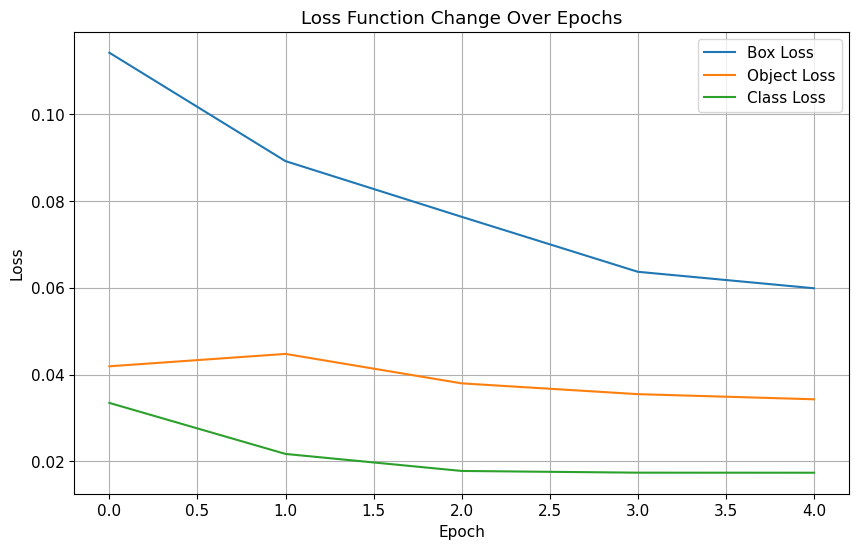

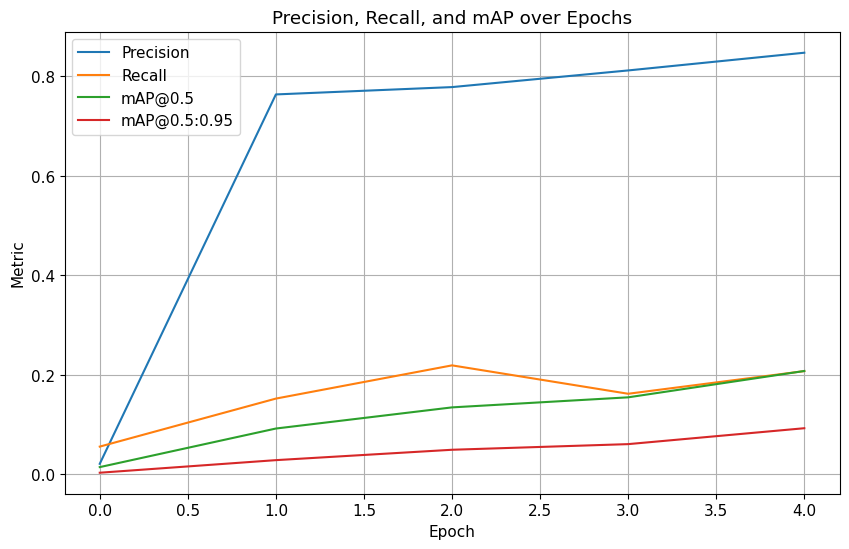

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Directory where training results are saved
results_file = './runs/train/face_mask/results.csv'

# Load the results file
results = pd.read_csv(results_file)

# Remove whitespace from column names
results.columns = results.columns.str.strip()

# Add magic command to display plots inline in Jupyter Notebook
%matplotlib inline

# Visualize the change in loss functions
plt.figure(figsize=(10, 6))
plt.plot(results['train/box_loss'], label='Box Loss')
plt.plot(results['train/obj_loss'], label='Object Loss')
plt.plot(results['train/cls_loss'], label='Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Change Over Epochs')
plt.legend()
plt.grid()
plt.show()

# Visualize Precision, Recall, and mAP
plt.figure(figsize=(10, 6))
plt.plot(results['metrics/precision'], label='Precision')
plt.plot(results['metrics/recall'], label='Recall')
plt.plot(results['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(results['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Precision, Recall, and mAP over Epochs')
plt.legend()
plt.grid()
plt.show()


The provided model best.py is evaluated using the face_mask.yaml configuration, along with the specified image size and IoU threshold. The validation results are used to assess how accurately the model performs its task.

In [21]:
!python val.py --weights runs/train/face_mask/weights/best.pt --data ./face_mask.yaml --img 640 --iou 0.65

val: data=./face_mask.yaml, weights=['runs/train/face_mask/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-326-gec331cbd Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/data/labels/val.cache... 161 images, 0 backgrounds, 0 corrupt: 100% 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [01:47<00:00, 17.92s/it]
                   all        161        713       0.84        0.2      0.207     0.0992
     wear_mask_correct        161        549      0.519      0.601      0.545      0.271
              non_mask        161        136          1     

Model performance was enhanced by tuning hyperparameters, specifically by adjusting the number of epochs and the batch size.

In [23]:
!python train.py --img 640 --batch 16 --epochs 50 --data ./face_mask.yaml --weights yolov5s.pt --name face_mask_tuned

2024-06-19 18:13:04.140862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 18:13:04.140932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 18:13:04.142835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=./face_mask.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False

Object Detection and Visualization:
The trained YOLO model was used to detect mask-wearing status in images and classify it into three categories. Libraries such as OpenCV were used to visualize the results.

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-6-19 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


선택된 이미지: ./data/images/test/maksssksksss207.png
이미지 로드 성공: ./data/images/test/maksssksksss207.png
예측 결과:
         xmin       ymin        xmax        ymax  confidence  class  \
0  281.733704  88.337352  314.255867  130.384933    0.691170      0   
1  166.868591  90.575063  204.715347  139.832954    0.686408      0   
2   31.888845  85.950893   52.084675   99.113255    0.501988      0   

                name  
0  wear_mask_correct  
1  wear_mask_correct  
2  wear_mask_correct  
바운딩 박스: (281.73370361328125, 88.33735241889953) - (314.25586700439453, 130.3849329471588), 라벨: wear_mask_correct 0.69, 색상: (0, 255, 0)
바운딩 박스: (166.86859130859375, 90.57506275177002) - (204.71534729003906, 139.83295412063597), 라벨: wear_mask_correct 0.69, 색상: (0, 255, 0)
바운딩 박스: (31.888844966888428, 85.95089299678803) - (52.08467483520508, 99.11325538158417), 라벨: wear_mask_correct 0.50, 색상: (0, 255, 0)


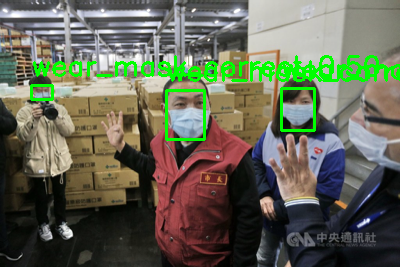

In [ ]:
import torch
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Set model path and data directories
model_path = './yolov5/runs/train/face_mask/weights/best.pt'
test_image_dir = './data/images/test'
test_label_dir = './data/labels/test'

# Get list of PNG files in the test directory
image_files = [f for f in os.listdir(test_image_dir) if f.endswith('.png')]

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Class names
class_names = ['wear_mask_correct', 'non_mask', 'wear_mask_incorrect']

def detect_and_visualize(image_path, conf_threshold=0.25):
    # Load image
    img = cv2.imread(image_path)
    original_shape = img.shape

    # Check if the image was loaded successfully
    if img is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        return None, None

    print(f"이미지 로드 성공: {image_path}")

    # Preprocess image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR to RGB
    img_resized = cv2.resize(img_rgb, (640, 640))
    img_resized = img_resized.transpose(2, 0, 1)  # HWC to CHW
    img_resized = np.ascontiguousarray(img_resized)

    # Perform prediction
    results = model(img_resized)

    # Postprocess results
    results_df = results.pandas().xyxy[0]  # x1, y1, x2, y2, confidence, class, name

    # Apply confidence threshold
    results_df = results_df[results_df['confidence'] >= conf_threshold]

    # Scale coordinates back to original image size
    results_df['xmin'] = results_df['xmin'] * (original_shape[1] / 640)
    results_df['xmax'] = results_df['xmax'] * (original_shape[1] / 640)
    results_df['ymin'] = results_df['ymin'] * (original_shape[0] / 640)
    results_df['ymax'] = results_df['ymax'] * (original_shape[0] / 640)

    # Debug: print prediction results
    print("예측 결과:")
    print(results_df)

    return img, results_df

def draw_boxes(img, results_df):
    # Handle case when no bounding boxes are detected
    if results_df.empty:
        print("예측된 객체가 없습니다.")
        return img

    # Visualize results
    for index, row in results_df.iterrows():
        x1, y1, x2, y2, conf, cls = row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['confidence'], row['class']
        label = f"{class_names[int(cls)]} {conf:.2f}"
        color = (0, 255, 0) if int(cls) == 0 else (0, 0, 255) if int(cls) == 1 else (255, 0, 0)

        print(f"바운딩 박스: ({x1}, {y1}) - ({x2}, {y2}), 라벨: {label}, 색상: {color}")

        # Draw bounding box
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return img

def show_image_with_labels(image_path):
    img, results_df = detect_and_visualize(image_path)
    if img is not None:
        img = draw_boxes(img, results_df)
        # Display image using OpenCV
        cv2_imshow(img)

# Randomly select an image from the test directory and visualize detections
random_image = random.choice(image_files)
random_image_path = os.path.join(test_image_dir, random_image)
print(f"선택된 이미지: {random_image_path}")
show_image_with_labels(random_image_path)


To evaluate the model's performance, the ground truth labels and the predicted labels for a randomly selected image are compared. A confusion matrix and classification report are then generated and displayed based on this comparison.

선택된 이미지: ./data/images/test/maksssksksss566.png
실제 라벨: [0, 2, 0, 0, 0, 0, 0]
이미지 로드 성공: ./data/images/test/maksssksksss566.png
예측 결과:
         xmin        ymin        xmax        ymax  confidence  class  \
0  264.514713   73.359568  290.547771  101.242497    0.627062      0   
1  100.790997   75.196481  126.338387  103.199043    0.594843      0   
2  252.437458  247.334433  300.836353  280.719309    0.429480      0   

                name  
0  wear_mask_correct  
1  wear_mask_correct  
2  wear_mask_correct  
바운딩 박스: (264.5147132873535, 73.35956811904907) - (290.5477714538574, 101.24249696731567), 라벨: wear_mask_correct 0.63, 색상: (0, 255, 0)
바운딩 박스: (100.79099655151367, 75.1964807510376) - (126.33838653564453, 103.19904327392578), 라벨: wear_mask_correct 0.59, 색상: (0, 255, 0)
바운딩 박스: (252.43745803833008, 247.3344326019287) - (300.83635330200195, 280.7193088531494), 라벨: wear_mask_correct 0.43, 색상: (0, 255, 0)


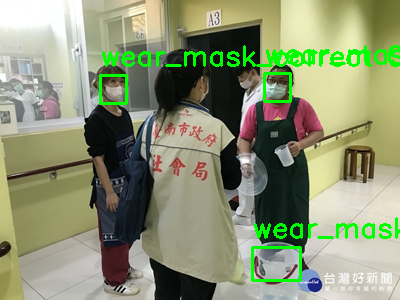

예측 결과가 없습니다.
선택된 이미지: ./data/images/test/maksssksksss374.png
실제 라벨: [0, 0, 0, 1, 0]
이미지 로드 성공: ./data/images/test/maksssksksss374.png
예측 결과:
         xmin        ymin        xmax        ymax  confidence  class  \
0  186.451206   22.157892  214.393520   52.926830    0.443968      0   
1   24.974108   82.024212   49.675627  114.380390    0.390427      0   
2  177.544460   25.599472  222.380619   44.255831    0.307075      0   
3   95.918312   57.131121  119.282303   83.651865    0.270453      0   
4  185.475788  142.759953  223.468227  183.857426    0.259962      0   

                name  
0  wear_mask_correct  
1  wear_mask_correct  
2  wear_mask_correct  
3  wear_mask_correct  
4  wear_mask_correct  
바운딩 박스: (186.4512062072754, 22.157891750335693) - (214.3935203552246, 52.92683029174805), 라벨: wear_mask_correct 0.44, 색상: (0, 255, 0)
바운딩 박스: (24.97410774230957, 82.02421188354492) - (49.67562675476074, 114.38039016723633), 라벨: wear_mask_correct 0.39, 색상: (0, 255, 0)
바운딩 박스: (177.5444602

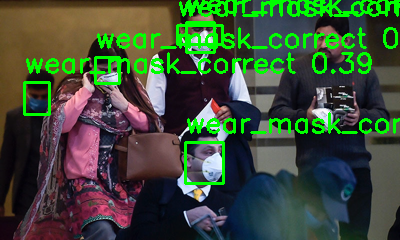

예측 결과가 없습니다.
선택된 이미지: ./data/images/test/maksssksksss740.png
실제 라벨: [0, 0]
이미지 로드 성공: ./data/images/test/maksssksksss740.png
예측 결과:
         xmin       ymin        xmax       ymax  confidence  class  \
0  272.133827  48.705477  300.370369  78.261238    0.659062      0   
1  141.579628  54.422142  167.610493  93.208572    0.649936      0   

                name  
0  wear_mask_correct  
1  wear_mask_correct  
바운딩 박스: (272.13382720947266, 48.70547676086426) - (300.37036895751953, 78.2612377166748), 라벨: wear_mask_correct 0.66, 색상: (0, 255, 0)
바운딩 박스: (141.57962799072266, 54.42214164733886) - (167.61049270629883, 93.20857200622558), 라벨: wear_mask_correct 0.65, 색상: (0, 255, 0)


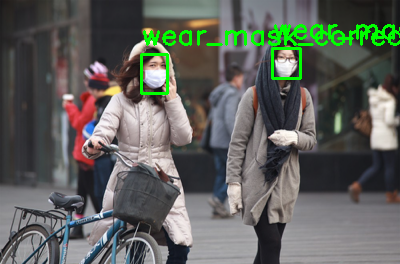

예측 결과가 없습니다.
선택된 이미지: ./data/images/test/maksssksksss706.png
실제 라벨: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
이미지 로드 성공: ./data/images/test/maksssksksss706.png
예측 결과:
          xmin        ymin        xmax        ymax  confidence  class  \
0   284.655399  144.226371  322.721405  174.678461    0.703159      0   
1   177.295895  119.848237  208.198147  146.239649    0.682272      0   
2   112.915888  111.101368  140.949297  139.547220    0.673962      0   
3   232.093525   86.917593  262.882938  120.823894    0.665748      0   
4   296.528149   81.973531  321.281586   99.882177    0.661486      0   
5   111.029873   83.509930  134.346638   99.592592    0.649674      0   
6    12.799170  127.041742   71.018753  169.811762    0.647606      0   
7   154.948692   90.535907  179.905891  107.779324    0.632438      0   
8    81.981096  117.270428  106.865225  135.802374    0.608501      0   
9   348.076973   90.689621  363.502769  105.998371    0.600605      0   
10  341.852646   88.

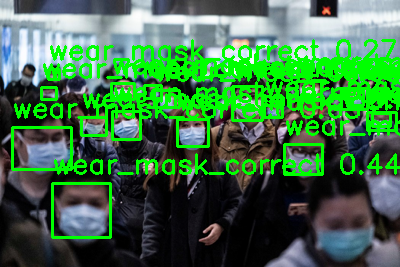

예측 결과가 없습니다.
선택된 이미지: ./data/images/test/maksssksksss566.png
실제 라벨: [0, 2, 0, 0, 0, 0, 0]
이미지 로드 성공: ./data/images/test/maksssksksss566.png
예측 결과:
         xmin        ymin        xmax        ymax  confidence  class  \
0  264.514713   73.359568  290.547771  101.242497    0.627062      0   
1  100.790997   75.196481  126.338387  103.199043    0.594843      0   
2  252.437458  247.334433  300.836353  280.719309    0.429480      0   

                name  
0  wear_mask_correct  
1  wear_mask_correct  
2  wear_mask_correct  
바운딩 박스: (264.5147132873535, 73.35956811904907) - (290.5477714538574, 101.24249696731567), 라벨: wear_mask_correct 0.63, 색상: (0, 255, 0)
바운딩 박스: (100.79099655151367, 75.1964807510376) - (126.33838653564453, 103.19904327392578), 라벨: wear_mask_correct 0.59, 색상: (0, 255, 0)
바운딩 박스: (252.43745803833008, 247.3344326019287) - (300.83635330200195, 280.7193088531494), 라벨: wear_mask_correct 0.43, 색상: (0, 255, 0)


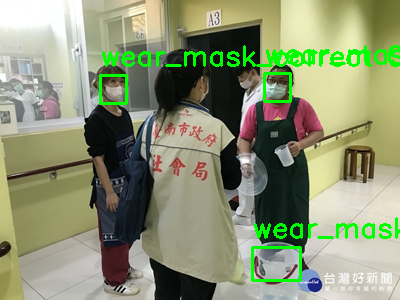

예측 결과가 없습니다.
혼동 행렬:
[[ 0  0  0 35]
 [ 0  0  0  1]
 [ 0  0  0  2]
 [ 0  0  0  0]]

분류 보고서:
                     precision    recall  f1-score   support

  wear_mask_correct       0.00      0.00      0.00       0.0
           non_mask       0.00      0.00      0.00      35.0
wear_mask_incorrect       0.00      0.00      0.00       1.0
            unknown       0.00      0.00      0.00       2.0

           accuracy                           0.00      38.0
          macro avg       0.00      0.00      0.00      38.0
       weighted avg       0.00      0.00      0.00      38.0



In [ ]:
# Lists to store ground truth and predicted labels for performance evaluation
true_labels = []
pred_labels = []

# Number of randomly selected image files
num_images_to_test = 5

for _ in range(num_images_to_test):
    random_image = random.choice(image_files)
    random_image_path = os.path.join(test_image_dir, random_image)
    print(f"선택된 이미지: {random_image_path}")

    # Read ground truth labels
    label_path = os.path.join(test_label_dir, random_image.replace('.png', '.txt'))
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            true_labels_current = [int(line.split()[0]) for line in f.readlines()]
            true_labels.extend(true_labels_current)
            print(f"실제 라벨: {true_labels_current}")

        # Predicted labels
        results_df = show_image_with_labels(random_image_path)
        if results_df is not None:
            pred_labels_current = results_df['class'].tolist()
            pred_labels.extend(pred_labels_current)
            print(f"예측 라벨: {pred_labels_current}")
        else:
            print("예측 결과가 없습니다.")
            # If no prediction, fill predicted labels with -1 for each ground truth
            pred_labels.extend([-1] * len(true_labels_current))
    else:
        print(f"라벨 파일이 없습니다: {label_path}")

# Performance evaluation
if len(true_labels) > 0 and len(pred_labels) > 0:
    conf_matrix = confusion_matrix(true_labels, pred_labels, labels=[0, 1, 2, -1])
    report = classification_report(true_labels, pred_labels, target_names=class_names + ["unknown"])

    print("혼동 행렬:")
    print(conf_matrix)
    print("\n분류 보고서:")
    print(report)
else:
    print("평가할 라벨이 충분하지 않습니다.")
